# HEART DISEASE PREDICTION

FROM SCRATCH KNN, SVM, LOGISTIC REGRESSION

In [3]:
# IMPORTING ALL THE REQUIRED LIBRARIES

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statistics as stats
from sklearn.model_selection import train_test_split
import cvxpy as cp
from sklearn import metrics as sm
import warnings
warnings.filterwarnings('ignore')

In [4]:
# LOADING THE DATASET

df = pd.read_csv('heart_d_p.csv') # loading the dataset
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [5]:
df.shape

(1025, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [7]:
#DF=pd.get_dummies(data=df,columns=['-----------'],drop_first=True)
#if there are string values we can convert it tp numeric by replacing them with dummy variables

In [8]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [9]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [10]:
df.isnull().sum() # Using this command we check whether there are null values in the given dataset

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [11]:
#Ay we can observe from the above data there no null values present in the data taken by us
#If there are null values we can replace with mode or mean values

# df['column_name'].unique()
# df['column_name'].value_counts()
# df['column_name'].mean()
# df['column_name'].median()

# replace null values with either mean or mode
# col_median = df['column_name'].median()
# df['column_name'].fillna(col_median, inplace=True)

In [12]:
#getting the detailed information about each paritular column
info = ["age","1: male, 0: female","chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic","resting blood pressure"," serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl","resting electrocardiographic results (values 0,1,2)"," maximum heart rate achieved","exercise induced angina","oldpeak = ST depression induced by exercise relative to rest","the slope of the peak exercise ST segment","number of major vessels (0-3) colored by flourosopy","thal: 3 = normal; 6 = fixed defect; 7 = reversable defect"]
for i in range(len(info)):
    print(df.columns[i]+":\t\t"+info[i])

age:		age
sex:		1: male, 0: female
cp:		chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
trestbps:		resting blood pressure
chol:		 serum cholestoral in mg/dl
fbs:		fasting blood sugar > 120 mg/dl
restecg:		resting electrocardiographic results (values 0,1,2)
thalach:		 maximum heart rate achieved
exang:		exercise induced angina
oldpeak:		oldpeak = ST depression induced by exercise relative to rest
slope:		the slope of the peak exercise ST segment
ca:		number of major vessels (0-3) colored by flourosopy
thal:		thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


<function matplotlib.pyplot.show(close=None, block=None)>

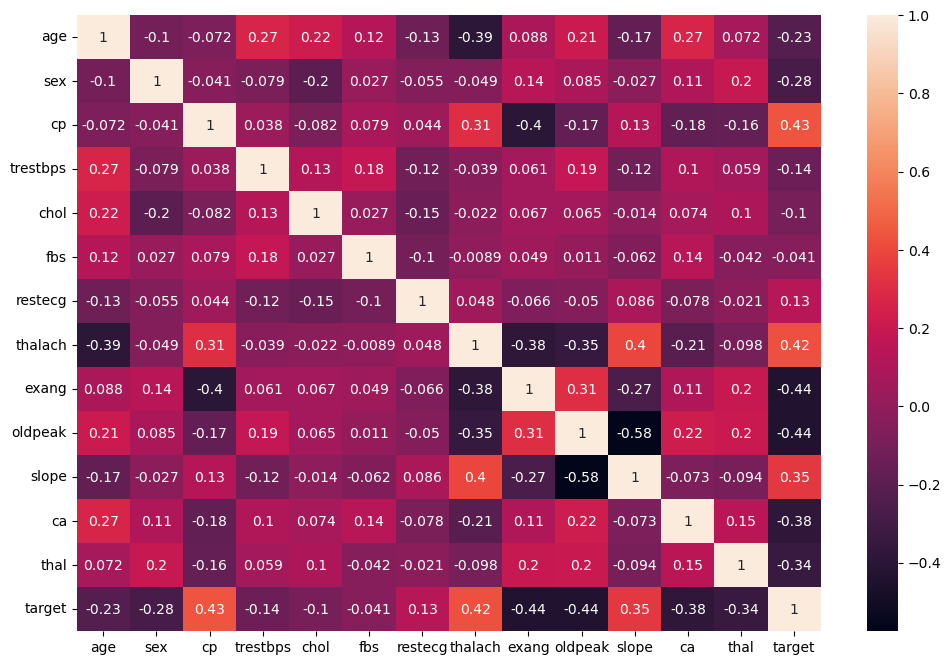

In [13]:
#Now lets check the correlation with the column attributes.
import matplotlib.pyplot as plt 
correlation=df.corr()
plt.figure(figsize=(12,8))
a = sns.heatmap(correlation, annot=True)
plt.show 

<Figure size 1000x1000 with 0 Axes>

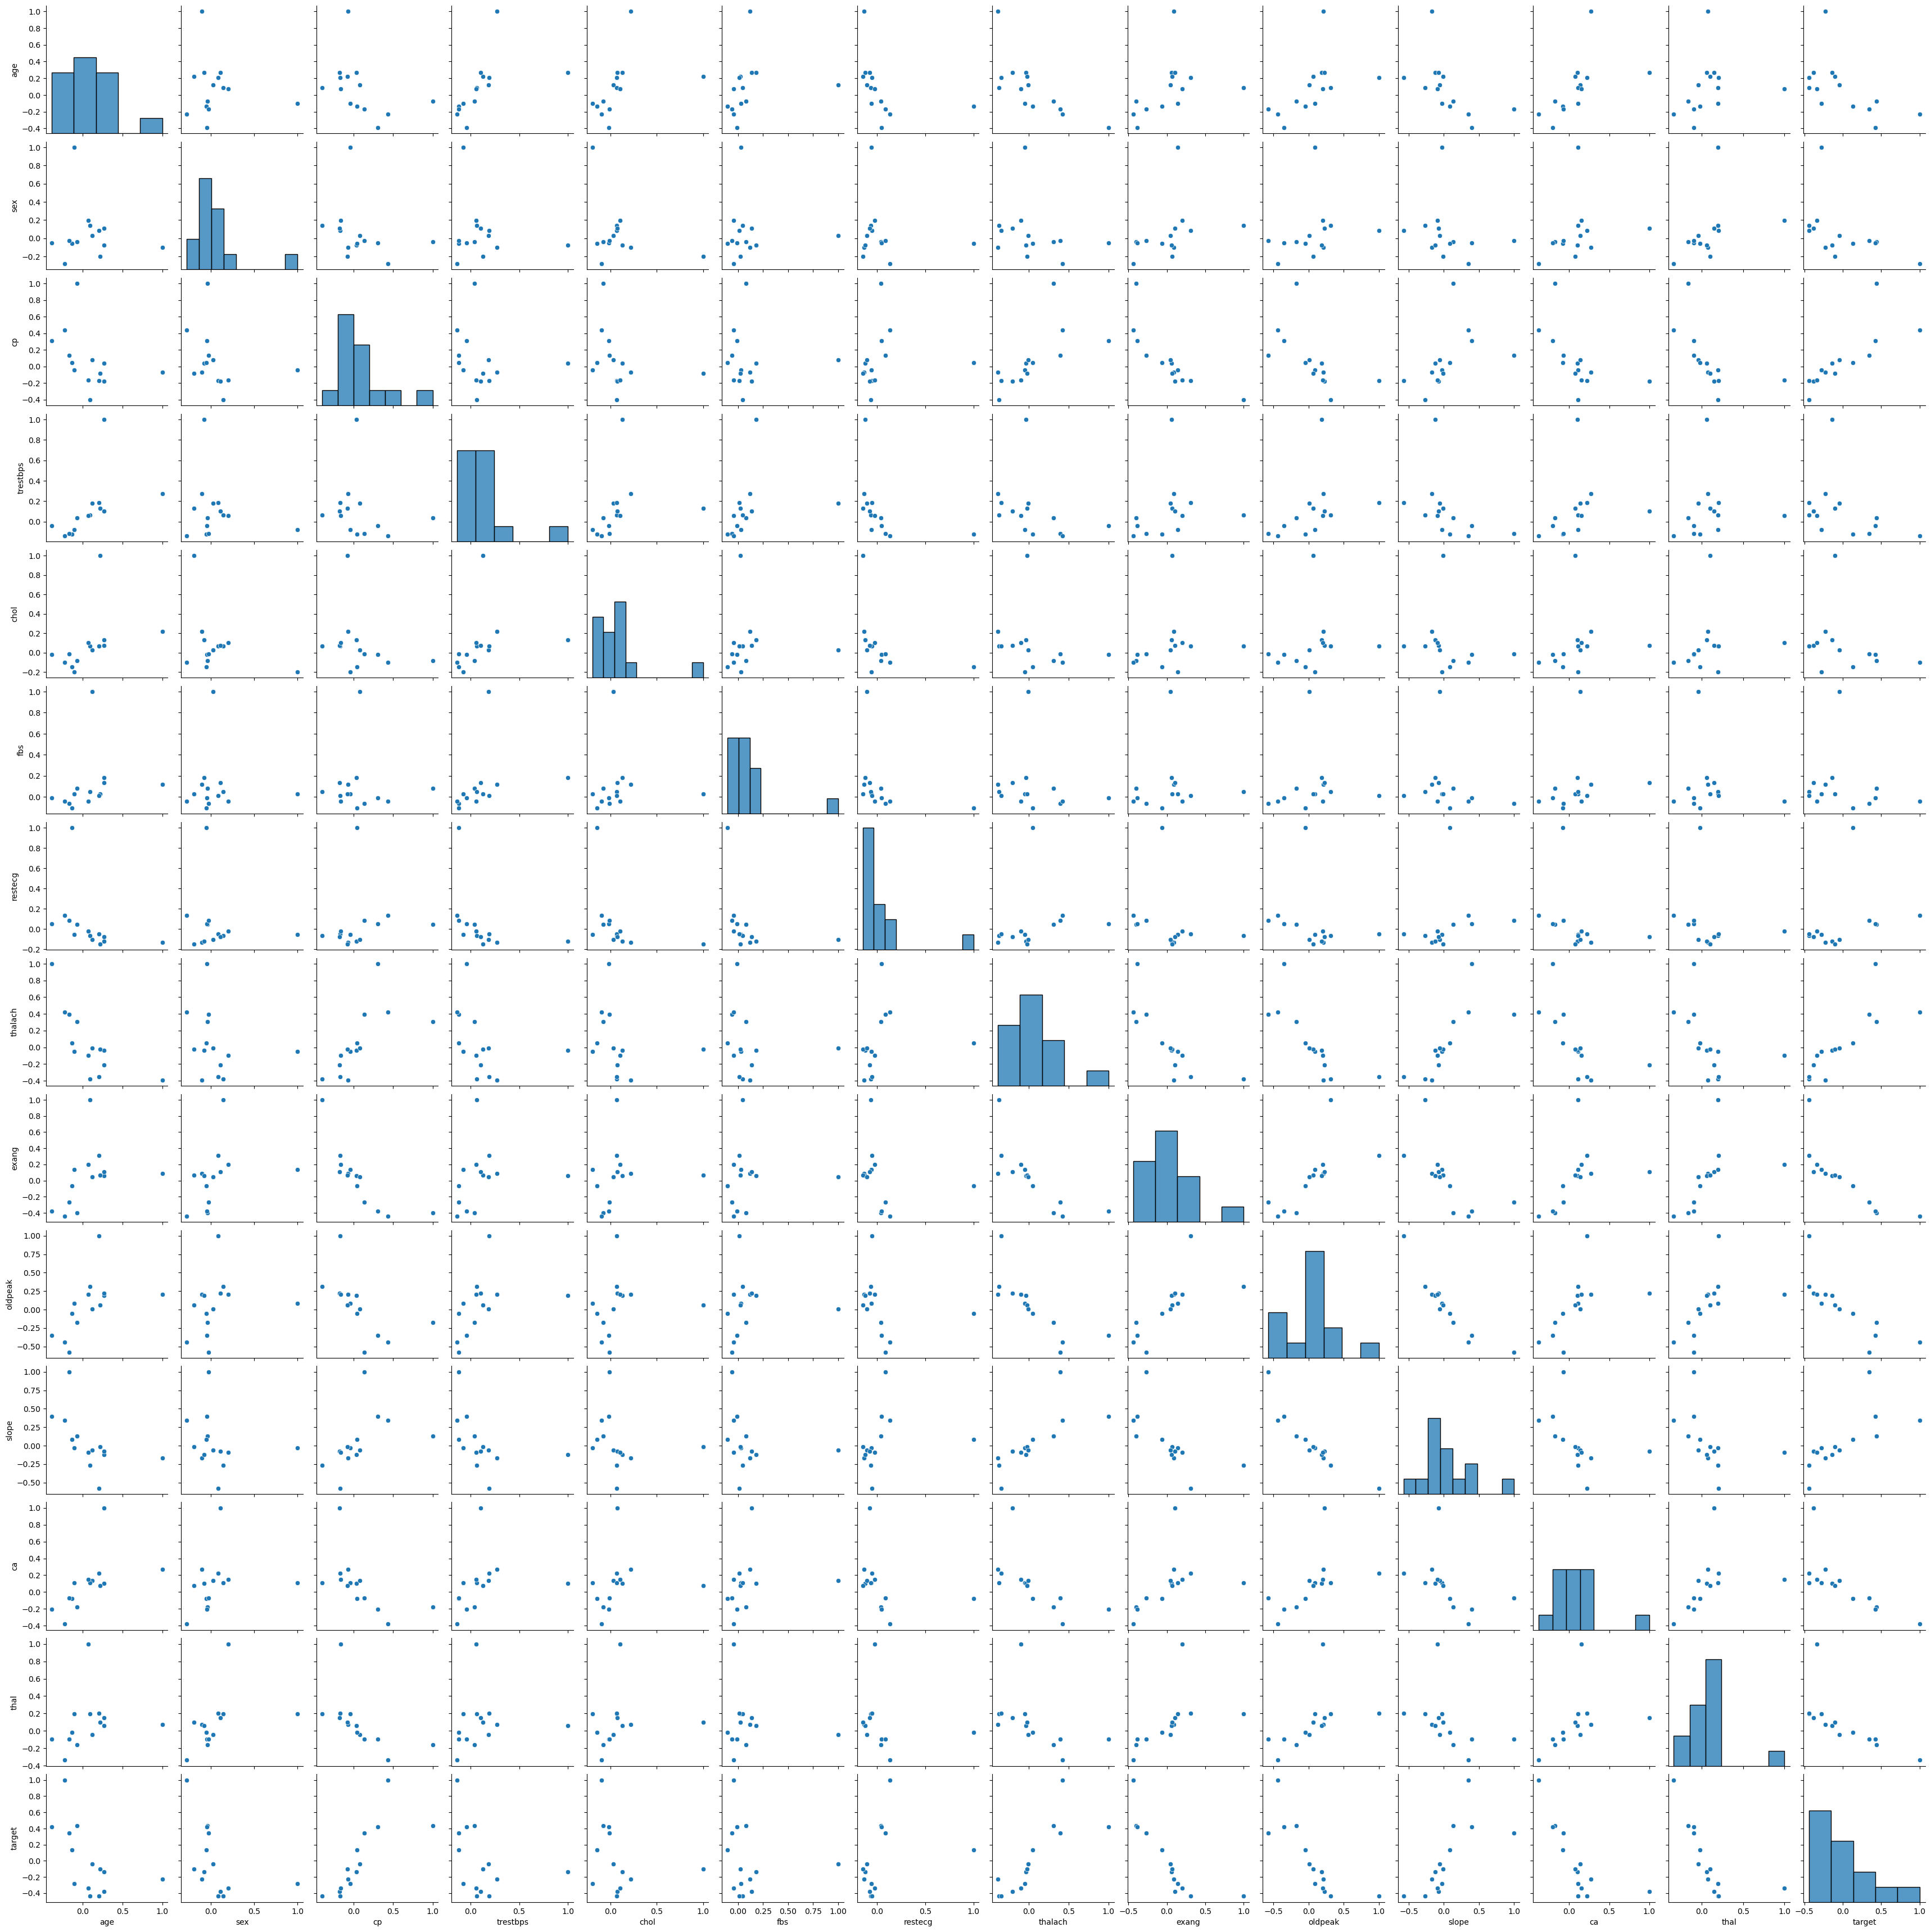

In [14]:
plt.figure(figsize = (10, 10))
sns.pairplot(correlation)
plt.show()

In [15]:
#Now taking the output as y and rest of the data to x
y=df['target']
x=df.drop(columns='target')
y=y.replace(0,-1)

Percentage of patience with heart problems: 51.31707317073171
Percentage of patience with heart problems: 48.68292682926829


<AxesSubplot:xlabel='target', ylabel='count'>

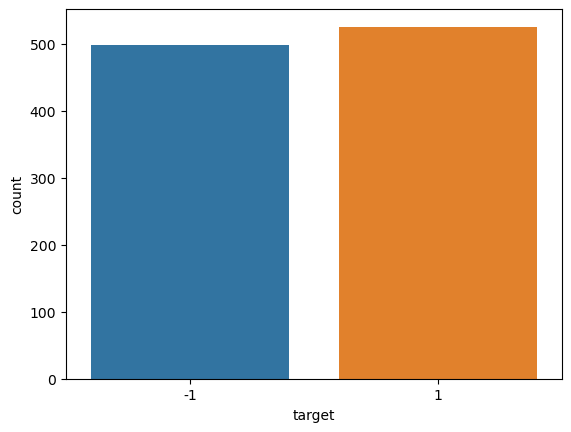

In [16]:
print("Percentage of patience with heart problems: "+str(y.where(y==1).count()*100/1025))
print("Percentage of patience with heart problems: "+str(y.where(y==-1).count()*100/1025))
sns.countplot(y)

In [17]:
#Scaling the data with different types of scaling methods

#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#features = scaler.fit_transform(x)

#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#features = scaler.fit_transform(x)

from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X = scaler.fit_transform(x)

# SVM From Scratch

In [48]:
#Initializing the class for Declaring SVM-classification
class SVM_SVC_L2:
    #declaring main initial class:
    #Here in SVM we have two parts SVC for classification and SVR for regression
    def __init__(self):
        self.w_L2=None
        self.g_L2=None
        self.slack_L2=None
        self.x=None
        self.y=None
        self.data=None
        self.labels=None
        
    def _optimize_L2(self,x,y,c):
        c=1.05 #Controlled weight for reducing error
        L = len(x) # No of rows
        e = np.ones(L)
        x_columns=x.shape[1] 
        D=np.diag(y) # Labels Matrix
        w_L2=cp.Variable(x_columns)
        g_L2=cp.Variable(1)
        slack_L2=cp.Variable(L)
        obj = cp.Minimize((0.5*cp.norm(w_L2)**2)+(c/2)*cp.norm(slack_L2)**2)
        cons = [np.matmul(D,x*w_L2 - e*g_L2)+slack_L2==e]
        prob=cp.Problem(obj, cons)
        prob.solve()
        w_L2=np.array(w_L2.value)
        g_L2=g_L2.value
        slack_L2=np.array(slack_L2.value)
        return w_L2,g_L2,slack_L2
 
        
    #Converting the PD to array and the optimizing the data.
    def fit(self,X,y):
        if isinstance(X,pd.DataFrame): 
            self.data = [f for f in X.columns]
            self.x=np.array(X)
        else:
            self.x=X
        if isinstance(y,pd.DataFrame): 
            self.labels = [f for f in y.columns]
            self.y=np.array(y).reshape(-1,1)
        else:
            self.y=y
            
        self.w_L2,self.g_L2,self.slack_L2=self._optimize_L2(self.x,self.y,0.1)
    
    #Prediction for one complete row
    def _prediction(self,x):
        x.shape
        x=x.reshape(x.shape[0],1)
        x.shape
        pred=(np.matmul(self.w_L2,x) - self.g_L2)
        if pred>0:
            return 1
        elif pred<0:
            return -1
        
    #Prediction  for all the rows in a data using for loop   
    def predict(self,x):
        ypred=[]
        x=np.array(x)
        for i in range(0,x.shape[0]):
            ypred.append(self._prediction(x[i,:]))
        return ypred

In [49]:
data=[i for i in x.columns]
labels='target'

In [20]:
[X_train,X_test,Y_train,Y_test] = train_test_split(X,y,test_size=0.3,random_state=100)
svm=SVM_SVC_L2()
svm.fit(X_train,Y_train)
y_pred = svm.predict(X_test)
print("Confusion Matrix: \n",sm.confusion_matrix(Y_test,y_pred))
print("Accuracy Score: ",sm.accuracy_score(Y_test,y_pred))
SVM_acc = sm.accuracy_score(Y_test,y_pred)
print("Classification Report: ",sm.classification_report(Y_test,y_pred))

Confusion Matrix: 
 [[107  33]
 [  9 159]]
Accuracy Score:  0.8636363636363636
Classification Report:                precision    recall  f1-score   support

          -1       0.92      0.76      0.84       140
           1       0.83      0.95      0.88       168

    accuracy                           0.86       308
   macro avg       0.88      0.86      0.86       308
weighted avg       0.87      0.86      0.86       308



In [44]:
X.shape

(1025, 13)

# Comparision with Inbuilt SVM: 

In [21]:
from sklearn.svm import SVC
import matplotlib.pyplot as plt

[X_train,X_test,Y_train,Y_test] = train_test_split(X,y,test_size=0.3,random_state=100)
svc = SVC()
svc.fit(X_train,Y_train)
y_pred = svc.predict(X_test)
print("Confusion Matrix:")
print(sm.confusion_matrix(Y_test,y_pred))
print("Accuracy Score: ")
print(sm.accuracy_score(Y_test,y_pred))
print("Complete Report")
print(sm.classification_report(Y_test,y_pred))




Confusion Matrix:
[[127  13]
 [ 13 155]]
Accuracy Score: 
0.9155844155844156
Complete Report
              precision    recall  f1-score   support

          -1       0.91      0.91      0.91       140
           1       0.92      0.92      0.92       168

    accuracy                           0.92       308
   macro avg       0.91      0.91      0.91       308
weighted avg       0.92      0.92      0.92       308



# KNN From Scratch

In [22]:
import numpy as np
import pandas as pd
import statistics as stats

class KNeighborsClassifier : 
    def __init__(self,n_neighbors=7): 
        self.n_neighbors=n_neighbors 
        self.data=[] #x
        self.labels=[] #y
        self.sampels=0 # no. of rows
        self.x=0 #initially
        self.y=0 #initially
        self.predicted_values=0
    
    #checking whether the data is numeric or not if it is not lets convert.
    def fit(self,x,y): 
        if isinstance(x,pd.DataFrame): 
            self.data = [f for f in x.columns]
            self.x=np.array(x)
        else:
            self.x=x 
        if isinstance(y,pd.DataFrame): 
            self.labels = [f for f in y.columns]
            self.y=np.array(y).reshape(-1)
        else:
            self.y=y 
            
        self.num_sampels=len(x)
        
    #Prediction  for all the rows in a data using for loop    
    def predict(self, p): 
        predict_values=[] 
        p=np.array(p) 
        for i in p: 
            p = dict(sorted(self._predictions(i).items())[0:self.n_neighbors]) 
            predict_values.append(stats.mode(p.values())) 
        self.predicted_values=predict_values
        return predict_values

    #Prediction for one complete row
    def _predictions(self,p):
        d=dict()
        for x,y in zip(self.x,self.y):
            dis=distance(x,p)
            d.update({dis:y})
        return d
# funtion for finding the distance of all the distacne of all the points and checking for nearest classes.
def distance (x,p): 
        l=list(map(lambda x,y:(x-y)**2,x,p))
        return np.sqrt(sum(l))
    

In [23]:
data=[i for i in x.columns]
labels='target'

In [24]:
[x_train,x_test,y_train,y_test] = train_test_split(X,y,test_size=0.3,random_state = 100)
knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)
print("Confusion Matrix: \n",sm.confusion_matrix(y_test,y_pred))
print("Accuracy Score: ")
print(sm.accuracy_score(Y_test,y_pred))
KNN_acc = sm.accuracy_score(Y_test,y_pred)
print("Complete Report")
print(sm.classification_report(Y_test,y_pred))

Confusion Matrix: 
 [[110  30]
 [ 10 158]]
Accuracy Score: 
0.8701298701298701
Complete Report
              precision    recall  f1-score   support

          -1       0.92      0.79      0.85       140
           1       0.84      0.94      0.89       168

    accuracy                           0.87       308
   macro avg       0.88      0.86      0.87       308
weighted avg       0.88      0.87      0.87       308



# Comparision with Inbuilt KNN: 

In [25]:
from sklearn.neighbors import KNeighborsClassifier
[x_train,x_test,y_train,y_test] = train_test_split(X,y,test_size=0.3,random_state = 100)
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)
print("Confusion Matrix: \n",sm.confusion_matrix(y_test,y_pred))
print("Accuracy Score: ")
print(sm.accuracy_score(Y_test,y_pred))
print("Complete Report")
print(sm.classification_report(Y_test,y_pred))

Confusion Matrix: 
 [[120  20]
 [ 32 136]]
Accuracy Score: 
0.8311688311688312
Complete Report
              precision    recall  f1-score   support

          -1       0.79      0.86      0.82       140
           1       0.87      0.81      0.84       168

    accuracy                           0.83       308
   macro avg       0.83      0.83      0.83       308
weighted avg       0.83      0.83      0.83       308



# Logistic Regression From Scratch

In [26]:
df = pd.read_csv('heart_d_p.csv')# loading the dataset
y=df['target']
X=df.drop(columns='target')

data=[i for i in X.columns]
target='target'

In [27]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X = scaler.fit_transform(X)

In [28]:
#Initializing the main class
class LogisticRegression:
    #defining the initial class, and declaring the variabeles
    def __init__(self,i=1000,alpha=0.001):
        self.i=i
        self.a=alpha
        self.data=[]
        self.target=[]
        self.num_samples=0 #no. of rows
        self.num_features=0 #no. of columns
        self.x=0 #initially 
        self.y=0
        self.w_n=0
        self.g_0=0
        
    #checking whether the data is numeric or not if it is not lets convert.    
    def fit(self,x,y):
        if isinstance(x,pd.DataFrame): 
            self.data = [f for f in x.columns]
            self.x=np.array(x)
        else:
            self.x=x 
        if isinstance(y,pd.DataFrame): 
            self.target = [f for f in y.columns]
            self.y=np.array(y).reshape(-1)
        else:
            self.y=y 
        self.num_samples=len(x)
        self.num_features=x.shape[1]
        
        self.w_n=np.zeros(self.num_features) # initially giving zeroes.
        
        # First to need to do Linear Regression for performing Logistic Regression
        for i in range(self.i):
            LR=np.dot(self.x, self.w_n) + self.g_0 #Line equation y=mx + c
            ht=self._sigmoid_function(LR)
            grad_wn,grad_g0=self._gradient_fns(ht,self.w_n,self.g_0)
            self.w_n-=self.a*grad_wn
            self.g_0-=self.a*grad_g0
            
    #finding the gradient function directly   
    def _gradient_fns(self,ht,w_n,g_0):
        grad_wn=np.dot(self.x.T, (ht-self.y))
        grad_wn=(1/self.num_samples)*grad_wn
        grad_g0=np.sum(ht-self.y)
        grad_g0=(1/self.num_samples)*grad_g0
        return grad_wn,grad_g0
    
    #Passing the above function into sigmoid function     
    def _sigmoid_function(self,x):
        output=1/(1+(np.exp(-x)))
        return output
    
    #Prediction for one complete row
    def _prediction(self,x):
        u=np.dot(x, self.w_n) + self.g_0
        q=self._sigmoid_function(u)
        #sigmoid function gives the values from 0 to 1 so,
        if q>0.5:
            return 1
        elif q<0.5:
            return 0
    
    #Prediction  for all the rows in a data using for loop 
    def predict(self,x):
        predicted_values=[]
        x=np.array(x)
        for i in x:
            predicted_values.append(self._prediction(i))
        return predicted_values

In [29]:
[x_train,x_test,y_train,y_test] = train_test_split(X,y,test_size=0.2,random_state =0)
lg = LogisticRegression(i=1000)
lg.fit(x_train,y_train)
y_pred = lg.predict(x_test)
print("Confusion Matrix: \n",sm.confusion_matrix(y_test,y_pred))
print("Accuracy Score: ",sm.accuracy_score(y_test,y_pred))
LR_acc = sm.accuracy_score(y_test,y_pred)
print("Classification Report: ",sm.classification_report(y_test,y_pred))

Confusion Matrix: 
 [[88 10]
 [22 85]]
Accuracy Score:  0.8439024390243902
Classification Report:                precision    recall  f1-score   support

           0       0.80      0.90      0.85        98
           1       0.89      0.79      0.84       107

    accuracy                           0.84       205
   macro avg       0.85      0.85      0.84       205
weighted avg       0.85      0.84      0.84       205



# Comparision with Inbuilt Logistic Regression : 

In [30]:
from sklearn.linear_model import LogisticRegression
[x_train,x_test,y_train,y_test] = train_test_split(X,y,test_size=0.3,random_state =45)
lg = LogisticRegression()
lg.fit(x_train,y_train)
y_pred = lg.predict(x_test)
print("Confusion Matrix: \n",sm.confusion_matrix(y_test,y_pred))
print("Accuracy Score: ",sm.accuracy_score(y_test,y_pred))
print("Classification Report: ",sm.classification_report(y_test,y_pred))

Confusion Matrix: 
 [[114  29]
 [ 24 141]]
Accuracy Score:  0.827922077922078
Classification Report:                precision    recall  f1-score   support

           0       0.83      0.80      0.81       143
           1       0.83      0.85      0.84       165

    accuracy                           0.83       308
   macro avg       0.83      0.83      0.83       308
weighted avg       0.83      0.83      0.83       308



The accuracy score achieved using Support Vector Machine is: 0.8636363636363636 %
The accuracy score achieved using K-Nearest Neighbors is: 0.8701298701298701 %
The accuracy score achieved using Logistic Regression is: 0.8439024390243902 %


<AxesSubplot:xlabel='models', ylabel='Accuracy score'>

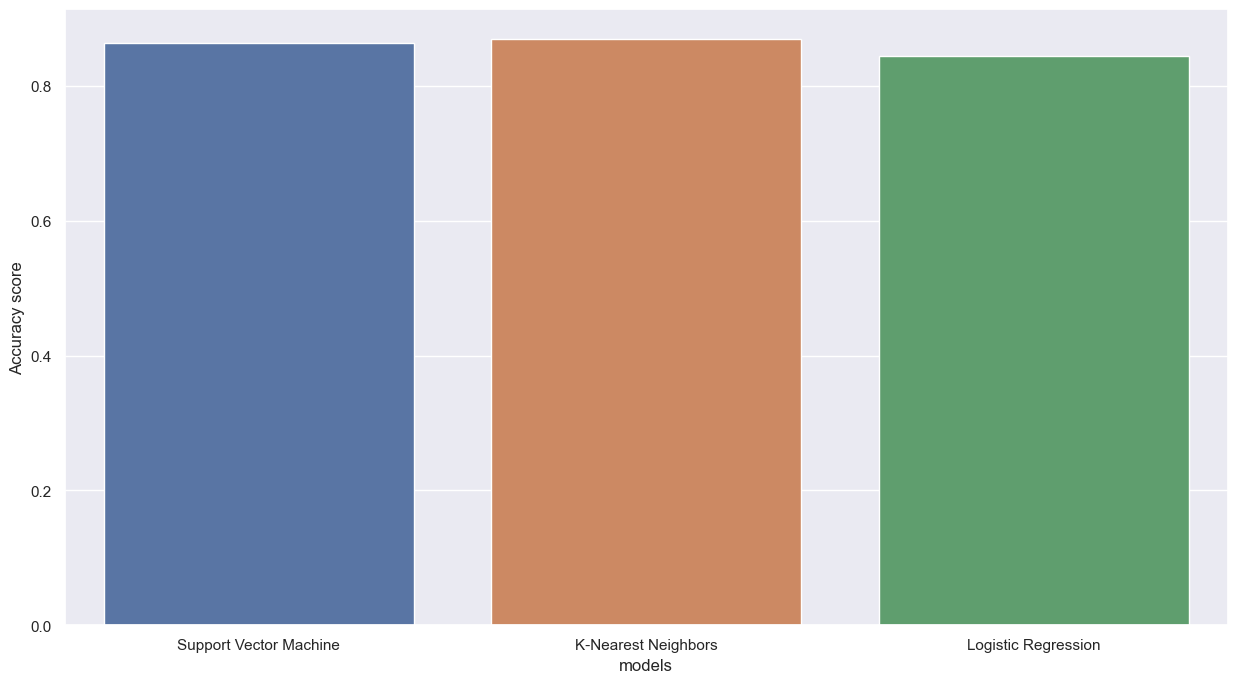

In [31]:
scores = [SVM_acc,KNN_acc,LR_acc]
models = ["Support Vector Machine","K-Nearest Neighbors","Logistic Regression"]    

for i in range(len(models)):
    print("The accuracy score achieved using "+models[i]+" is: "+str(scores[i])+" %")

sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("models")
plt.ylabel("Accuracy score")

sns.barplot(models,scores)